In [29]:
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten

In [30]:
ASL_train = pd.read_csv('sign_mnist_train\sign_mnist_train.csv')
ASL_test = pd.read_csv('sign_mnist_test\sign_mnist_test.csv')

In [31]:
X_train = ASL_train.drop('label',axis=1)
y_train = ASL_train['label']
X_test = ASL_test.drop('label',axis=1)
y_test = ASL_test['label']

In [32]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [33]:
X_train = X_train.reshape(27455,28,28)
X_test = X_test.reshape(7172,28,28)

In [55]:
X_train = X_train/255
X_test = X_test/255

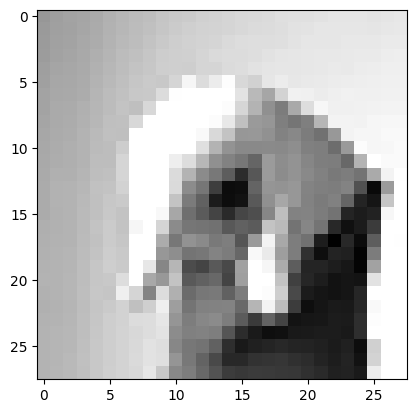

In [86]:
plt.imshow(X_train[5],cmap='gray')

In [83]:
import string

d = dict(zip(string.ascii_lowercase, list(range(0,26))))

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25}

In [97]:
model = Sequential()

model.add(Conv2D(8, (3,3), activation='relu', input_shape=(28,28,1)))


model.add(Conv2D(32, (3,3), activation='relu'))

model.add(MaxPool2D(2,2))

model.add(Conv2D(32, (3,3), activation='relu'))

model.add(MaxPool2D(2,2))





model.add(Flatten())
model.add(Dense(50,activation='relu'))
          
model.add(Dense(26,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train,y_train, epochs=6, batch_size=100, validation_split=0.1)

Epoch 1/6
248/248 [==============================] - 16s 58ms/step - loss: 1.7558 - accuracy: 0.4738 - val_loss: 0.6796 - val_accuracy: 0.7972
Epoch 2/6
248/248 [==============================] - 17s 69ms/step - loss: 0.3811 - accuracy: 0.8889 - val_loss: 0.1933 - val_accuracy: 0.9545
Epoch 3/6
248/248 [==============================] - 16s 65ms/step - loss: 0.0977 - accuracy: 0.9792 - val_loss: 0.0380 - val_accuracy: 0.9960
Epoch 4/6
248/248 [==============================] - 15s 61ms/step - loss: 0.0268 - accuracy: 0.9971 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 5/6
248/248 [==============================] - 18s 73ms/step - loss: 0.0099 - accuracy: 0.9995 - val_loss: 0.0091 - val_accuracy: 0.9993
Epoch 6/6
248/248 [==============================] - 18s 74ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000


In [98]:
model.evaluate(X_test,y_test)

225/225 [==============================] - 1s 5ms/step - loss: 0.6463 - accuracy: 0.8685


[0.6462534666061401, 0.8685164451599121]

In [58]:
a = model.predict(X_test)

225/225 [==============================] - 2s 8ms/step


In [59]:

print(f'Model: {[np.argmax(a[x]) for x in range (0,10)]}')
print(f'''True values:
{y_test[0:10]}''')

Model: [6, 5, 10, 0, 3, 21, 10, 14, 3, 7]
True values:
0     6
1     5
2    10
3     0
4     3
5    21
6    10
7    14
8     3
9     7
Name: label, dtype: int64
